['S', 'C', 'C', 'C', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'A', 'A', 'B', 'B', 'B', 'B', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'C', 'C', 'C', 'C', 'C', 'A', 'A', 'B', 'B', 'A', 'A', 'B', 'A']
red
[(0, 1), (1, 1), (2, 1), (3, 1), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2), (10, 2), (11, 2), (12, 2), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (28, 2), (29, 2), (30, 2), (31, 2), (32, 2), (33, 2), (34, 2), (35, 2), (36, 2), (37, 2), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (42, 2), (43, 2), (44, 2), (45, 2), (46, 2), (47, 2), (48, 2), (49, 2), (50, 2), (50, 1)]
blue
[(0, 1), (0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (21, 0), (22, 0), (23, 0), 

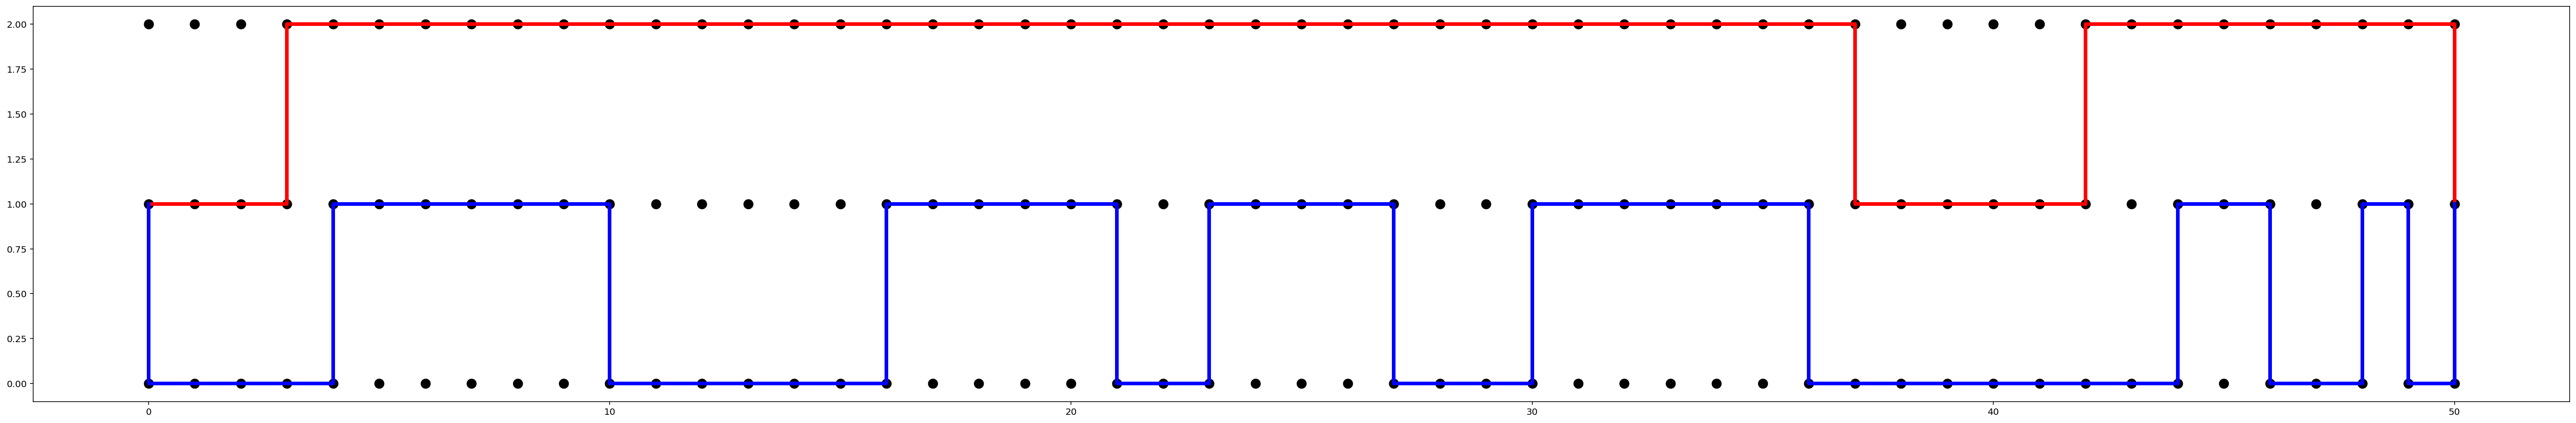

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from os import listdir
from PIL import Image
from matplotlib.pyplot import MultipleLocator


P_BA = 0.3 # b
P_CA = 0.2 # r
P_AA = 0.5 # 1-b-r

P_CB = 0 #
P_AB = 0.3 # b
P_BB = 0.7 # 1-b

P_BC = 0
P_AC = 0.2 # r
P_CC = 0.8 # 1-r
# assume r = 0.2, b = 0.3

def get_next_state(cur_s):
    if cur_s == 'A':
        if random.uniform(0, 1) > (P_CA + P_BA):# > r + b = 0.5
            return 'A'
        elif random.uniform(0, 1) < P_CA: # < r = 0.2
            return 'C'
        else:
            return 'B'

    elif cur_s == 'B':
        if random.uniform(0, 1) > P_AB: # > b = 0.3
            return 'B'
        else:
            return 'A'

    elif cur_s == 'C':
        if random.uniform(0, 1) > P_AC: # < r = 0.2
            return 'C'
        else:
            return 'A'

def main():
    sequence = ['S']
    coordinates_red = [(0, 1)] # assume red and blue meet in the middle at the first
    coordinates_blue = [(0, 1)]
    start = random.randint(1, 3)
    if start == 1:
        sequence.append('A')
        coordinates_red.append((0, 2))
        coordinates_red.append((1, 2))
        coordinates_blue.append((0, 0))
        coordinates_blue.append((1, 0))
    elif start == 2:
        sequence.append('B')
        coordinates_red.append((0, 2))
        coordinates_red.append((1, 2))
        coordinates_blue.append((1, 1))
    else:
        sequence.append('C')
        coordinates_red.append((1, 1))
        coordinates_blue.append((0, 0))
        coordinates_blue.append((1, 0))
    for i in range(0, 49):
        next_state = get_next_state(sequence[i + 1])
        if next_state == 'A' and sequence[i + 1] == 'A': # A->A
            coordinates_red.append((i + 2, 2))
            coordinates_blue.append((i + 2, 0))
        elif next_state == 'A' and sequence[i + 1] == 'B': # B->A
            coordinates_red.append((i + 2, 2))
            coordinates_blue.append((i + 1, 0))
            coordinates_blue.append((i + 2, 0))
        elif next_state == 'A' and sequence[i + 1] == 'C': # C->A
            coordinates_red.append((i + 1, 2))
            coordinates_red.append((i + 2, 2))
            coordinates_blue.append((i + 2, 0))
        elif next_state == 'B' and sequence[i + 1] == 'B': # B->B
            coordinates_red.append((i + 2, 2))
            coordinates_blue.append((i + 2, 1))
        elif next_state == 'B' and sequence[i + 1] == 'A': # A->B
            coordinates_red.append((i + 2, 2))
            coordinates_blue.append((i + 1, 1))
            coordinates_blue.append((i + 2, 1))
        elif next_state == 'C' and sequence[i + 1] == 'C': # C->C
            coordinates_red.append((i + 2, 1))
            coordinates_blue.append((i + 2, 0))
        elif next_state == 'C' and sequence[i + 1] == 'A': # A->C
            coordinates_red.append((i + 1, 1))
            coordinates_red.append((i + 2, 1))
            coordinates_blue.append((i + 2, 0))
        sequence.append(next_state)
    coordinates_red.append((len(sequence) - 1, 1))
    coordinates_blue.append((len(sequence) - 1, 1)) # assume ends in the middle

    print(sequence)
    print('red')
    print(coordinates_red)
    print('blue')
    print(coordinates_blue)
    red_x = []
    red_y = []
    blue_x = []
    blue_y = []
    for i in coordinates_red:
        red_x.append(i[0])
        red_y.append(i[1])
    for i in coordinates_blue:
        blue_x.append(i[0])
        blue_y.append(i[1])
    x = []
    for i in range(len(sequence)):
        for j in range(3):
            x.append(i)
    y = []
    for i in range(len(sequence)):
        for j in range(3):
            y.append(j)
    plt.figure(figsize=(50,8))
    plt.ylim(-0.1, 2.1)
    plt.scatter(x, y, c = 'black', s = 100)
    plt.plot(red_x, red_y, color = 'r', linewidth = 4)
    plt.plot(blue_x, blue_y, color = 'b', linewidth = 4)
    plt.show()


if __name__ == "__main__":
    main()